## Multiple linear regression

Multiple linear regression can be used to explore the variation in dependant variables caused by the variation in the independant variables. It helps us to learn how various predictors are influencing our variable of interest and also used to predict the variable outcome.

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
# selecting the dependant and the independant variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


We will convert the categorical variables to dummy variables for computation purposes. LabelEncoder() in python allows us to perform this operation. Then we will use onehotencoder()  to notify that dummay variables are nominal and not categorical.

In [4]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

#mentioning only the categorical  variable
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

### Dummy variable trap
When we convert categorical variable(n) into dummy variables, it is enough we create (n-1) dummy variables as n dummy  variables will result in redundancy. However we shall not worry about it, as Python's sklearn package takes care of it. Failure to retain to (n-1) variables could result  in multicolinearlity ( state where theres much correleation between the variables)




In [5]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]


#however for education purposes , I am adding this manually now.But we can skip this part later

In [6]:
# splitting the dataset into train and testing.
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We will import the LinearRegression class from sklearn package and create an object for the class. Then we can fit the object to the training dataset


In [7]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

### Model Selection
Optimum model produces accurate predictive results. It is important we choose the right set of predictors in our model for accuracy. One important tool that comes handy in model selection is  domain knowledge.  As an analyst, we shd know what are importnt factors that are influnecing the variable of interest. But there can be cases where  we can be unsure of "how to choose the best model". To counter those issues, a method caled bacckward elimination is used.

#### Backward elimination
Initially we set the significance level for our predictors as 5%(0.05). if any predictor has p-value greater than that, they're removed from the model. This process is repeated until we get a pack of optimal predictors whose p-values is less than 0.05. Then teh final set of predictors are used to fit the model.



In [10]:
#installing statsmodels to perform backward elimination
!pip install statsmodels==0.8.0
import statsmodels
print(statsmodels.__version__)

    100% |████████████████████████████████| 6.2MB 209kB/s ta 0:00:011
  Found existing installation: statsmodels 0.6.1
    Uninstalling statsmodels-0.6.1:
      Successfully uninstalled statsmodels-0.6.1
0.8.0


In [11]:
import statsmodels.formula.api as sm

#we are appending a new col with 1 as values to the X  datasets
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

In [12]:
# we will fit the model ith full set of predictors
X_opt = X[:, [0, 1, 2, 3, 4, 5]]

#creating  a regressor object using the  OLS class
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           1.34e-27
Time:                        16:44:14   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

FRom the list of p-values for all predictors, we can eliminate the X-varaiable with the highest value. From the summary, we can find X-2 has the maximum predictor variable hence eliminating that. 

In [13]:
X_opt = X[:, [0, 1, 3, 4, 5]]

We will continue process again and again until we get the optimal set of predictors (  those with p-value less than 0.05)

In [14]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           8.49e-29
Time:                        16:44:19   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# we will remove X1 and continue the process
X_opt = X[:, [0,3, 4, 5]]

#creating  a regressor object using the  OLS class
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           4.53e-30
Time:                        16:44:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# we will remove X4 and continue the process
X_opt = X[:, [0,3, 5]]

#creating  a regressor object using the  OLS class
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           2.16e-31
Time:                        16:44:21   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# we will remove X5 and continue the process
X_opt = X[:, [0,3]]

#creating  a regressor object using the  OLS class
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           3.50e-32
Time:                        16:44:22   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Thus we have ended up with constant variable and R&D variable. We cn say that R&D variable is the only statistically significant variable that can explain the variation the Profit variable

After selecting the predictor variables, we ca run the regression again to predict the profit price on all the  investments.

In [33]:
# creating a matrix for X and Y cols:
X = dataset.iloc[:, :1].values
y = dataset.iloc[:, 4].values


In [34]:
#importing the sklearn package
from sklearn.model_selection import train_test_split

In [35]:
#splitting the data into trainng and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [37]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print(y_pred)


[104667.27805998 134150.83410578 135207.80019517  72170.54428856
 179090.58602508 109824.77386586  65644.27773757 100481.43277139
 111431.75202432 169438.14843539]


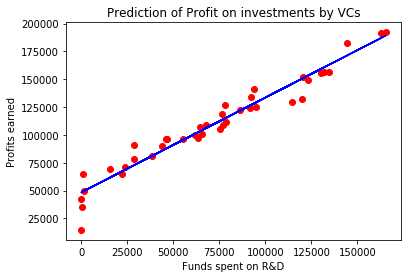

In [38]:
#plotting the graph to visualize the prediction on training data
#below code plots the actual values
plt.scatter(X_train, y_train, color = 'red')

#plotting x values and predicted-y values of training set
#below code also plots the trend (predicted values) line.
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Prediction of Profit on investments by VCs')
plt.xlabel('Funds spent on R&D')
plt.ylabel('Profits earned')
plt.show()

We can a linear relationship between the money spent on R&D and the profit earned by the VCs. Hence we can conclude that R&D is an influencial predictor in predicting the profits of the investments made by the VCs

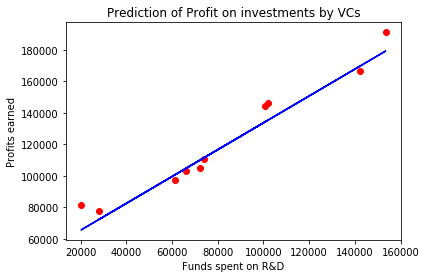

In [39]:
#plotting the graph to visualize the prediction on test data
#below code plots the actual values
plt.scatter(X_test, y_test, color = 'red')

#plotting x values and predicted-y values of training set
#below code also plots the trend (predicted values) line.
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Prediction of Profit on investments by VCs')
plt.xlabel('Funds spent on R&D')
plt.ylabel('Profits earned')
plt.show()